```
---
title: Intro Classification + KNN
duration: "1:5"
creator:
    name: Kiefer Katovich + David Yerrington
    city: SF
---
```

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Intro to Classification + KNN
Week 5 | Lesson 1.1


![](https://snag.gy/RKWYcC.jpg)

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Identify classification problems
- Implement KNN with sklearn

---

# (5 mins) Discussion:

# 1.  Exactly what is classification and how is it different than regression?
# 2 . What sort of problems do you solve with classification?

# Identify that problem:  Classification or Regression?

![](https://snag.gy/0j5DbL.jpg)




# Identify that problem: Classification or Regression?

![](https://snag.gy/Rk6sEw.jpg)

# Identify that problem: Classification or Regression?

<br>
<center>_Predicting bathrooms on Star Trek starships based on dilithium crystal size and warp capabilities._</center>

![](https://snag.gy/9Nok4x.jpg)

# Identify that problem: Classification or Regression?
<br>

![](https://snag.gy/lS3FNa.jpg)

## Identify that Problem: Classification or Regression

![](http://i.imgur.com/B67Ojpe.gif)

## Classification Intro

![](https://snag.gy/0Jns5x.jpg)

Classifcation methods in machine learning are fundamentally supervised methods where the training data which observations are associated with a (discrete) label designating their class.  Classification is different than regression (with continious values) because we are now predicting classes / labels.  This can be thought of as a discrimination problem, modelling the differences or similarities between groups. 

*Classifcation is supervised because we know the labels of our trained / sampled observations.*





## Common Classification Problems

The realm of classifcation is vast in the machine learning world.  Working with labled data still gives us the opporuntity to measure error.

### Facial Recognition
![](http://3qeqpr26caki16dnhd19sv6by6v.wpengine.netdna-cdn.com/wp-content/uploads/2013/11/face_detection.jpg)

### Recommendation
![](https://snag.gy/zKcO31.jpg)

### Sentiment Analysis 
![](https://snag.gy/DbX2TL.jpg)

# Common Classification Methods

## K-Nearest Neighbors
![](https://snag.gy/J38wxN.jpg)

## Logistic Regression
![](https://snag.gy/NCnh3b.jpg)

## Naive Bayes
![](https://snag.gy/ZJwmn6.jpg)

## Decision Trees
![](https://snag.gy/cJL5gr.jpg)

## Classfication Evaluation

Classification is assessed much differently than continuious regression.  Generally, we are concerned with if we misidentified anything incorrectly, completely missed the mark, or predicted correctly between our traning and test sets during cross validation.  There are a few different things we usually talk about and look at when it pertains to classification related to these ideas such as **precision**, **recall**, **accuracy**, **F-measures**, **class imbalance**, and our beloved **Reciever Operator Curve**.

Once we get a sense of how our classfication method performs, we have the opporutnity to tune for sensitivity or specificity.

> **Sensitivity and specificity** are statistical measures of the performance of a binary classification test, also known in statistics as classification function:

> **Sensitivity** (also called the true positive rate, the recall, or probability of detection[1] in some fields) measures the proportion of positives that are correctly identified as such (e.g., the percentage of sick people who are correctly identified as having the condition).

> **Specificity** (also called the true negative rate) measures the proportion of negatives that are correctly identified as such (e.g., the percentage of healthy people who are correctly identified as not having the condition).

> [Sensitivity and Specificity](https://en.wikipedia.org/wiki/Sensitivity_and_specificity)


#### Confusion Matrix
![](https://snag.gy/qit9l3.jpg)

**Confusion Matrix - sklearn**
![](https://snag.gy/b6VDIo.jpg)

### ROC Figures
![](https://snag.gy/CBxZbh.jpg)

### sklearn "classification_report()"
```python
>>> from sklearn.metrics import classification_report
>>> y_true = [0, 1, 2, 2, 0]
>>> y_pred = [0, 0, 2, 1, 0]
>>> target_names = ['class 0', 'class 1', 'class 2']
>>> print(classification_report(y_true, y_pred, target_names=target_names))
             precision    recall  f1-score   support

    class 0       0.67      1.00      0.80         2
    class 1       0.00      0.00      0.00         1
    class 2       1.00      0.50      0.67         2

avg / total       0.67      0.60      0.59         5
```

# K Nearest Neighbors classification walkthrough

From here on out we are going to look at how the kNN algorithm classifies flower types using the infamous Setosa dataset

---

## kNN

![](https://snag.gy/hatSE6.jpg)

The pseudocode algorithm for kNN is as follows:



```
for unclassified_point in sample:
    for known_point in known_class_points:
        calculate distances (euclidean or other) between known_point and unclassified_point
    for k in range of specified_neighbors_number:
        find k_nearest_points in known_class_points to unclassified_point
    assign class to unclassified_point using "votes" from k_nearest_points
```
> ### Common KNN Distance Functions
> These distance functions can be used with KNN.  Euclidean is the most common choice.
>
> ### Euclidean  
> $\sqrt{\sum\limits_{i=1}^k(x_i - y_i)^2}$
>
> ### Manattan 
> $\sum\limits_{i=1}^k \left| x_i - y_i \right|$
>
> ### Minkowski
> $\left(\sum_{i=1}^n |x_i-y_i|^p\right)^{1/p}$

---

[NOTE: in the case of ties, sklearn's `KNeighborsClassifier()` will just choose the first class using uniform weights! If this is unappealing to you you can change the weights keyword argument to 'distance'.]

![](https://snag.gy/NcI7jE.jpg)
> Source: [Gamesetmap](http://gamesetmap.com/)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

%matplotlib inline
# %config InlineBackend.figure_format = 'retina' # Carefull witht his option.

#### KNN Distance Process (from scratch)

First some really simple data for example.

- We will plot this data and look at it
- Write a distance function
- Explore our paramter $K$
- Examine results

In [208]:
data = {
    "animal": ["cat", "cat", "cat", "dog", "dog", "dog"],
    "width": [30, 35, 40, 45, 50, 55],
    "height": [25, 20, 35, 40, 55, 52]
}

df = pd.DataFrame(data)
df.index = ["a", "b", "c", "d", "e", "f"]
df

,animal,height,width
a,cat,25,30
b,cat,20,35
c,cat,35,40
d,dog,40,45
e,dog,55,50
f,dog,52,55


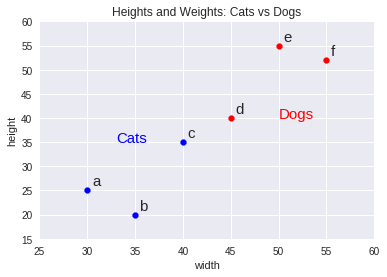

In [94]:
cat_plot = df.query('animal == "cat"').plot(
    title="Heights and Weights: Cats vs Dogs",
    kind="scatter", 
    x="width", y="height", s=35,
    color="blue"
)

dog_plot = df.query('animal == "dog"').plot(
    kind="scatter", 
    x="width", y="height", color="red", s=35,
    ax=cat_plot
)

dog_plot.set_xlim([25,60])
dog_plot.set_ylim([15,60])

## Add some labels to the points to keep reference
for index, (animal, height, width) in df.iterrows():
    plt.text(width + .5, height + 1, index, size=15)
    

plt.text(33, 35, s = "Cats", color="blue", size=15)
plt.text(50, 40, s = "Dogs", color="Red", size=15)

#### Introducing an "unknown point" of data

We know what cats and dogs kind of look like based on their hight and weight.  We can use this data to predict a new point.  

Let's invent a new point:
- height: 30, weight: 30

(15, 60)

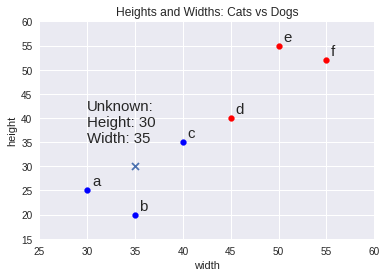

In [93]:
unknown = (35, 30) # What do you think this will be?

cat_plot = df.query('animal == "cat"').plot(
    title="Heights and Widths: Cats vs Dogs",
    kind="scatter", 
    x="width", y="height", s=35,
    color="blue"
)

dog_plot = df.query('animal == "dog"').plot(
    kind="scatter", 
    x="width", y="height", color="red", s=35,
    ax=cat_plot
)

dog_plot.set_xlim([25,60])
dog_plot.set_ylim([15,60])

# Add some labels to the points to keep reference
for index, (animal, height, width) in df.iterrows():
    plt.text(width + .5, height + 1, index, size=15)
 
# Our mysterious unknown point.  What could it be?
plt.scatter(unknown[0], unknown[1], marker="x")
plt.text(30, 35, "Unknown:\nHeight: 30\nWidth: 35", size=15)



In [24]:
unknown = np.array(unknown)
unknown 

array([35, 30])

### Let's find out how far each point is from the new "unknown point"
We can use other distance metrics in place of euclidean, but this is the most common case in which we employ KNN.

### $$
Distance = 
\sqrt(unknown_{width}) - width)^2 + (unknown_{height} - height)^2
$$

In [138]:
# there's also a distance function in scipy and in numpy that will do the same thing
def euclidean_distance(source, targets):
    
    distances = []
    
    for index, (animal, height, width) in targets.iterrows():
        
        distance = np.sqrt(
            (
                (source[0] - width) ** 2
            ) + (
                (source[1] - height) ** 2
            )
        )
        
        distances.append((index, animal, height, width, distance))
 
    distances_df = pd.DataFrame(distances, columns=["index", "animal", "height", "width", "distance"])
    return distances_df.set_index("index")
        

distances = euclidean_distance(unknown, df)
distances

,animal,height,width,distance
index,,,,
a,cat,25,30,7.071068
b,cat,20,35,10.000000
c,cat,35,40,7.071068
d,dog,40,45,14.142136
e,dog,55,50,29.154759
f,dog,52,55,29.732137


### Sidenote:  We can also get these values from numpy or scipy.

We can also arrive at the same conclusion about distances of our _unknown_ point to each of our known points using cdist (scipy) or a $norm$ (numpy) function, which can handle this basic distance metric.

> The norm is also known as magnitude (ie: length).

In [139]:
from scipy.spatial.distance import cdist

cdist([unknown], df[["width", "height"]].values)

array([[  7.07106781,  10.        ,   7.07106781,  14.14213562,
         29.15475947,  29.73213749]])

In [140]:
np.linalg.norm(unknown - df[["width", "height"]].values, axis=1)

array([  7.07106781,  10.        ,   7.07106781,  14.14213562,
        29.15475947,  29.73213749])

### Which points are closest to our unknown point?

In [141]:
distances.sort_values("distance")

,animal,height,width,distance
index,,,,
a,cat,25,30,7.071068
c,cat,35,40,7.071068
b,cat,20,35,10.000000
d,dog,40,45,14.142136
e,dog,55,50,29.154759
f,dog,52,55,29.732137


### Which $K$ points are closest to our unknown point?

In [206]:
K = 3
k_closest = distances.sort_values("distance").head(K)
k_closest

,animal,height,width,distance
index,,,,
a,cat,25,30,7.071068
c,cat,35,40,7.071068
b,cat,20,35,10.000000


(15, 60)

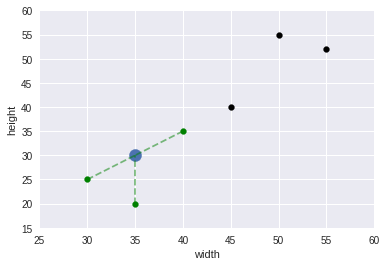

In [207]:
from matplotlib.lines import Line2D   

within_k = set(k_closest.index)
outside_k = set(distances.index).difference(within_k)

within_k_plot = df.loc[within_k].plot(
    kind="scatter", 
    x="width", y="height", color="green", s=35
)
   
df.loc[outside_k].plot(
    kind="scatter", 
    x="width", y="height", color="black", s=35,
    ax = within_k_plot
)

# Our unknown point
plt.scatter(unknown[0], unknown[1], s=150)

for index, (animal, height, width) in df.loc[within_k].iterrows():
    plt.plot(
        [width, unknown[0]], [height, unknown[1]], 
        color="green",
        linestyle="dashed",
        alpha = .5
    )

    
within_k_plot.set_xlim([25,60])
within_k_plot.set_ylim([15,60])

### What should we predict $\hat{y}$ for our unknown point?

What is the consequence of setting $K$ too high or too low?

## Introducing: `sklearn`

Up to this point, we may have not seen or used `sklearn` much. `sklearn` makes it easy to do machine learning through a consistent library of models, preprocessing, utilities, and datasets.  Many parts of `sklearn` are modular and can be used to build analysis `pipelines`.  There is a utility within `sklearn` called _pipeline_ but more broadly, a machine learning pipeline is a general procedural process that entails data acquisition, transformation, analysis, validation, and communication of results.

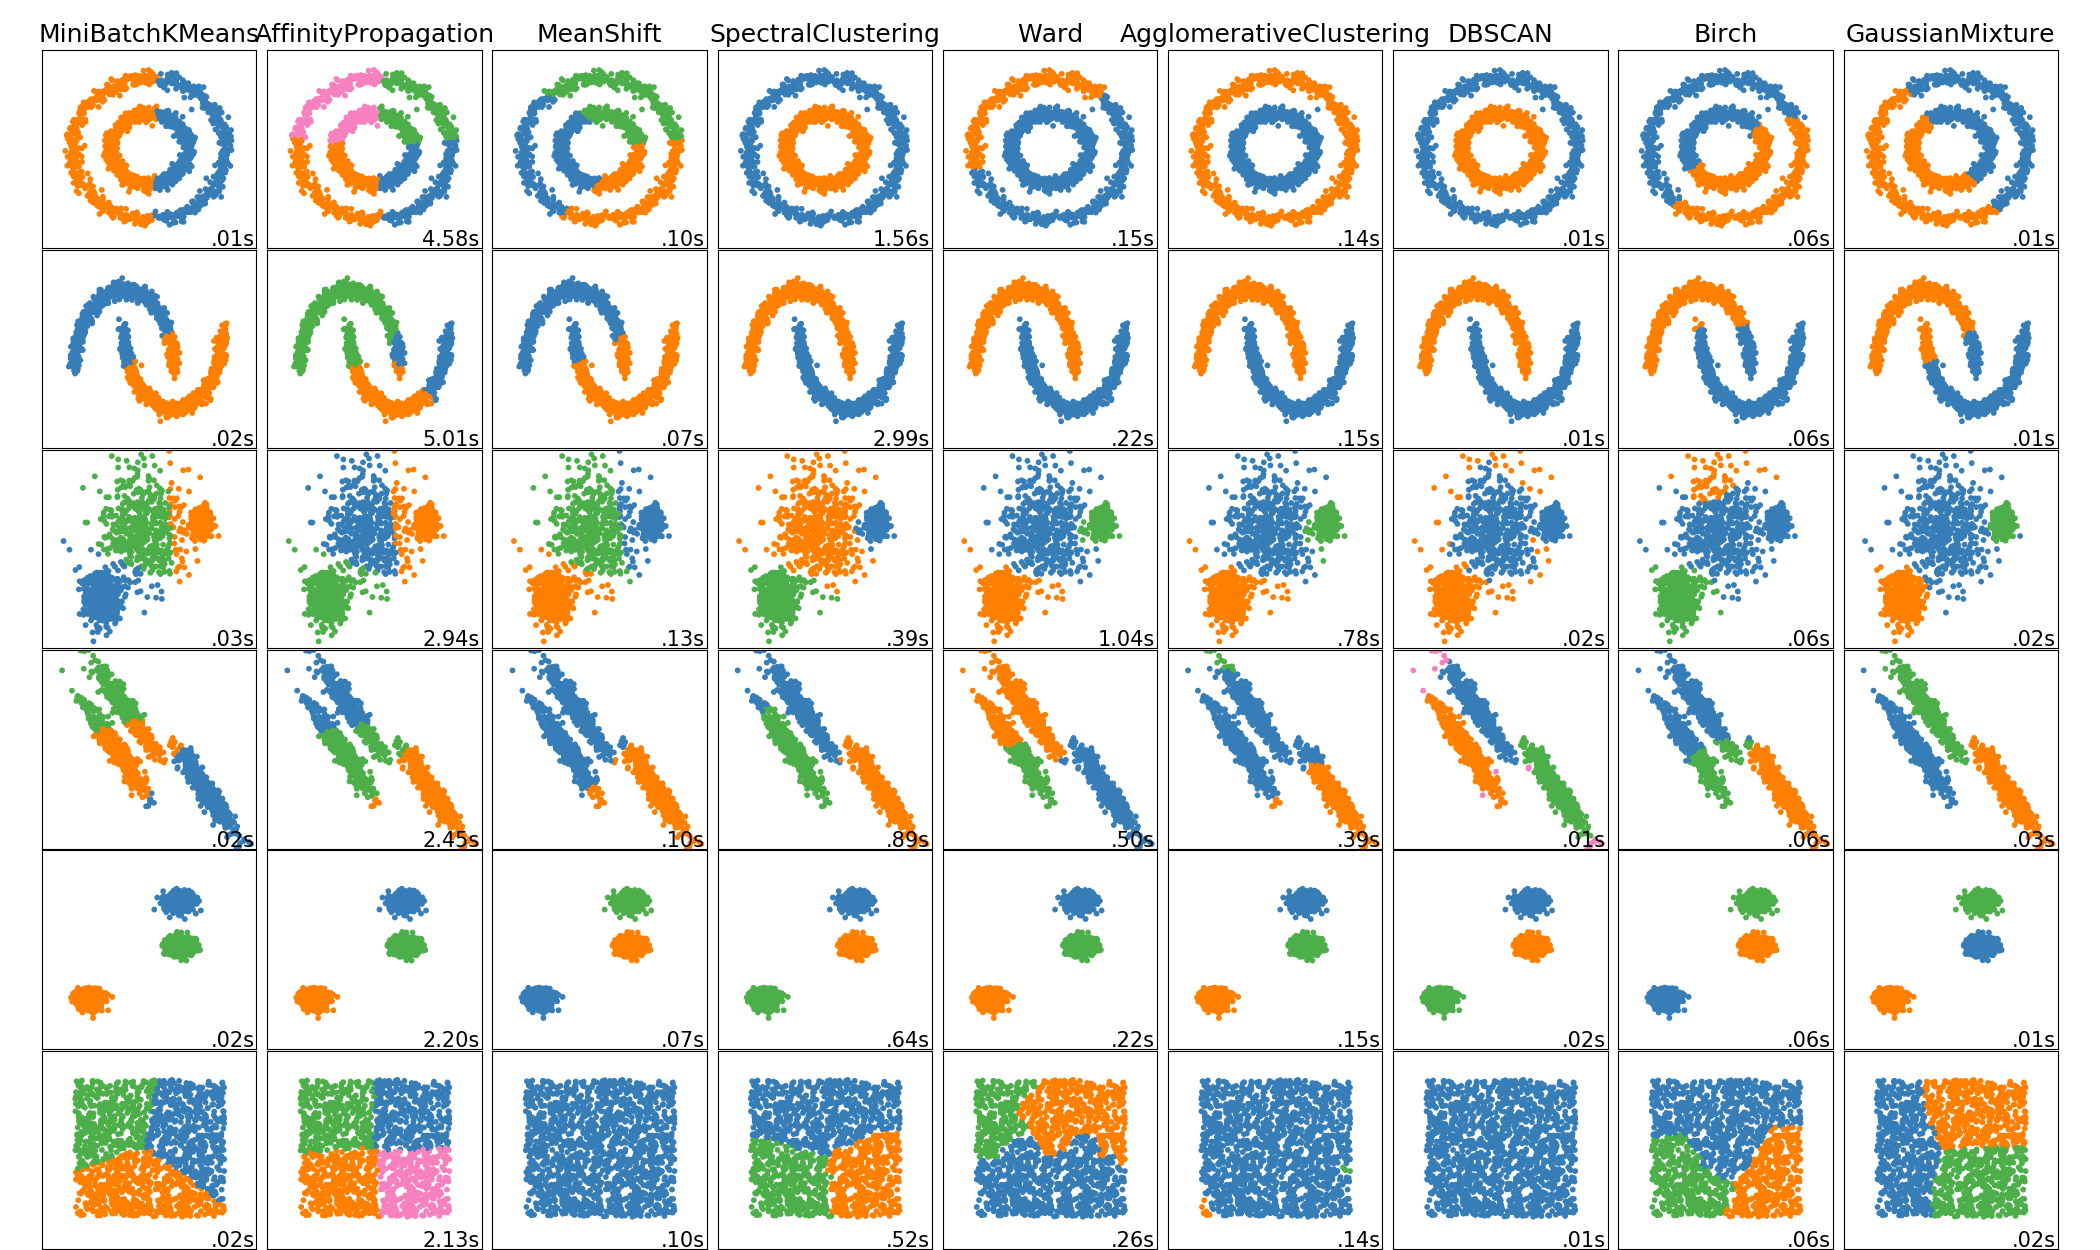

Sklearn is organized in these sections which comprise **supervized** and **unsupervized learning** within machine learning:

- Academic Datasets 
- Preprocessing 
- Model Selection 
- Regression 
- Classification 
- Dimensionality Reduction 
- Clustering 

[General Examples](http://scikit-learn.org/stable/auto_examples/index.html#general-examples)

In [211]:
import imp
plotter = imp.load_source('plotter', 'knn_plotter.py')
from plotter import KNNBoundaryPlotter


from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

### 1st, a basic implementation example

We're going to load the iris data, cast it into a `DataFrame`, encode a target variable, a target label reference, rename features / columns to start.

In [212]:
data = load_iris()
iris = pd.DataFrame(data['data'], columns=data['feature_names'])
iris['target']       =   data['target']
iris['target_label'] =   iris['target'].map(lambda target: data['target_names'][target])

column_map = {
    "sepal length (cm)":  'sepal_len',
    "sepal width (cm)":   'sep_width',
    "petal length (cm)":  'petal_len',
    "petal width (cm)":   'petal_width',
}

iris = iris.rename(columns=column_map)
iris.info() # Everything should look pretty clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal_len       150 non-null float64
sep_width       150 non-null float64
petal_len       150 non-null float64
petal_width     150 non-null float64
target          150 non-null int64
target_label    150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [214]:
iris.head()

,sepal_len,sep_width,petal_len,petal_width,target,target_label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### What does our data look like?
First, what does the range of our variables look like?

[None, None, None]

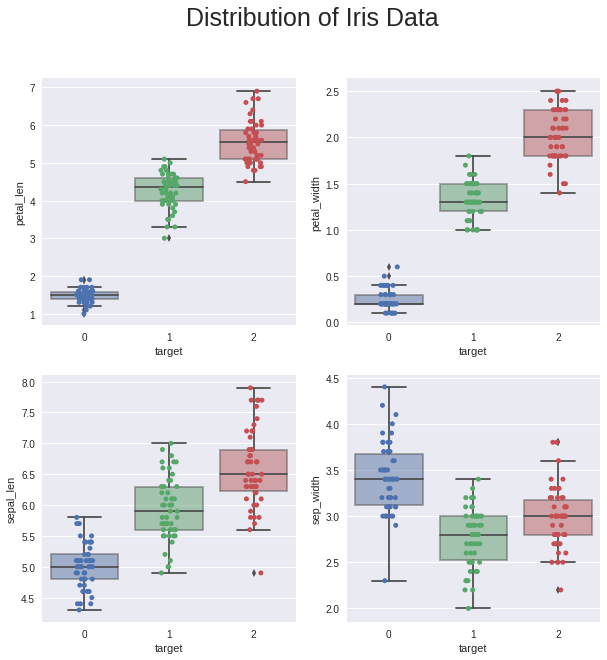

In [242]:
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species.  This allows the points a bit more contrasting / easier to see.

# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 10))

fig.suptitle("Distribution of Iris Data", fontsize=25)

sns.stripplot(x="target", y="petal_len", data=iris, jitter=True, edgecolor="gray", ax=ax[0,0])
sns.boxplot(x="target", y="petal_len", data=iris, ax=ax[0,0])

sns.stripplot(x="target", y="petal_width", data=iris, jitter=True, edgecolor="gray", ax=ax[0,1])
sns.boxplot(x="target", y="petal_width", data=iris, ax=ax[0,1])

sns.stripplot(x="target", y="sepal_len", data=iris, jitter=True, edgecolor="gray", ax=ax[1,0])
sns.boxplot(x="target", y="sepal_len", data=iris, ax=ax[1,0])

sns.stripplot(x="target", y="sep_width", data=iris, jitter=True, edgecolor="gray", ax=ax[1,1])
sns.boxplot(x="target", y="sep_width", data=iris, ax=ax[1,1])

plt.setp(ax[0,0].artists, alpha=.5) # This might be easier to see with transparency
plt.setp(ax[0,1].artists, alpha=.5) # This might be easier to see with transparency
plt.setp(ax[1,0].artists, alpha=.5) # This might be easier to see with transparency
plt.setp(ax[1,1].artists, alpha=.5) # This might be easier to see with transparency

### Let's see how our classes could be separated in 2D using a pairplot
With KNN, it's important to inspect your data.

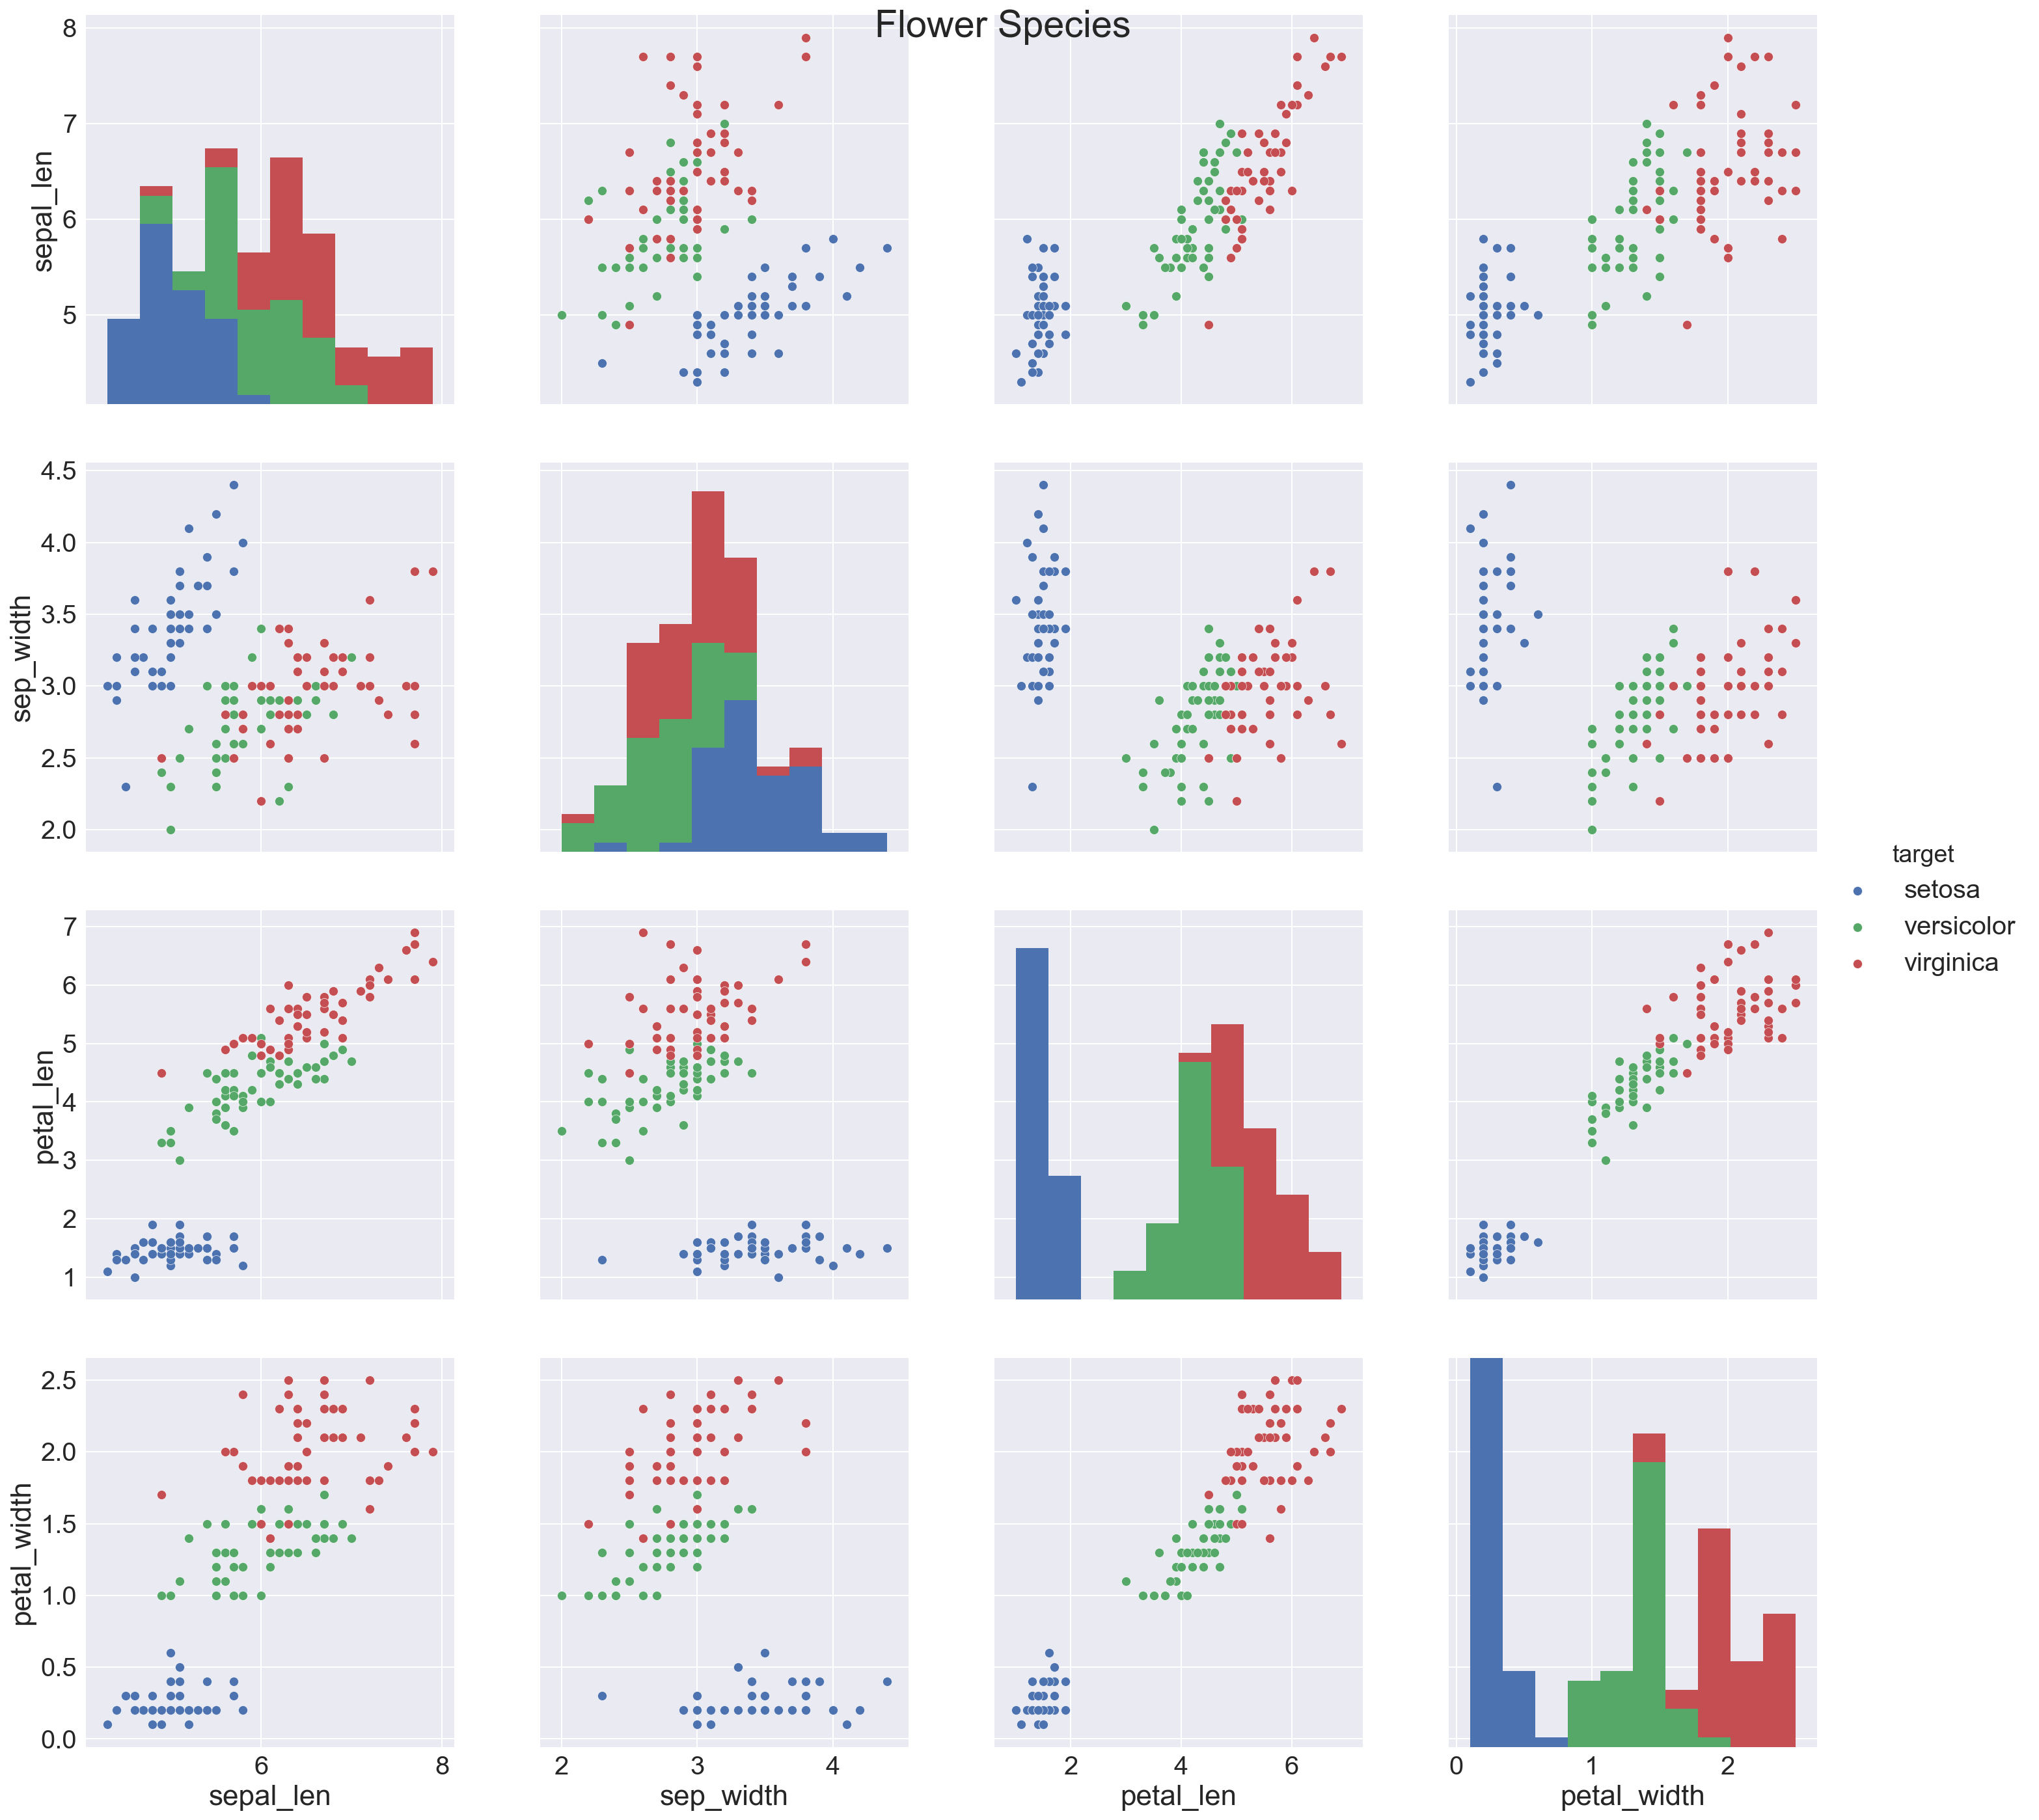

In [148]:
sns.pairplot(data=iris, size=5, hue="target") # Optionally: diag_kind="kde"
plt.rcParams["axes.labelsize"] = 20 # variable labels
sns.set(font_scale = 2) # tick size/scale

plt.suptitle('Flower Species')

### Fitting our first KNN model

A few basic **hyperparameters**.

- **n_neighbors** - The $K$ hyperparamter controlling the number of neighbors.  Default = 5.
- **weights** - "Uniform" weights consider a majority vote for making predictions.  It's also possible to consider distance in the voting proces so further points are penalized.
- **algorithm** - KNN with large datasets can be very inefficient at calculating all distances.  The way we programmed our very first example is a `brute_force` way of solving the distance calculations, however it's not the best way as our dataset grows in size.  There are a variety of ways in which we can avoid calculating all distances through other sampling methods such as `kd_tree` or `ball_tree`.
- **leaf_size** - This parameter is used to determine weather or not to use `brute_force` but it also determines how to optimize KD tree / Ball Tree.
- **p** - Distance metric to use.  1 = manhattan, 2 = (default) Euclidean, 3+ = Minkowski
- **metric** - This is only relevent if you're using p > 2.
- **n_jobs** - -1 means use all CPU cores for parallel jobs.  Default = 1.

> A _model parameter_ is an internal variable specific to the model and value can be estimated from data.  A **hyperparameter** is an external parameter that dictates how your model behaves.

> **KD Tree** works by splitting your dataset into smaller pieces and limiting your data.  It can work in multiple dimensions to approximately limit the data necessary to find points within a neighborhood of $K$.  [KD Tree explained](https://www.youtube.com/watch?v=TLxWtXEbtFE).  There are tradeoffs using this technique.  It's best to use "auto" for KNN because it can almost always determine the most effective way to limit the data it needs to calculate it's distances.

In [252]:
# Fitting our first sklearn KNN model
x, y = iris[["sepal_len", "sep_width"]], iris["target"]

knn = KNeighborsClassifier(n_neighbors=6)
model = knn.fit(x, y)

### .fit() for (almost) every model in `sklearn`

One of the most common question is with almost any model in `sklearn` is what does `.fit` do exactly?  We can feel this question formulating possibly?  Every model has it's own internal parameters that are calculated as a result of being "trained".  With linear regression, there are coefficients, means, R2, etc.  In KNN there are assumptions about how many neighbors need to be looked at, and roughly how we might sample some of the data once we try to predict once we feed it unknown points.

### Our model object can do some cool things

Such as make predictions and tell us things like accuracy (ie: `.score()`).

In [256]:
# Score our training data
model.score(x, y)

0.83999999999999997

### Lets predict an unknown point!
Let's look at the data first and then pick a point or two.  Maybe we move this point around to see what it predicts?

array([2])

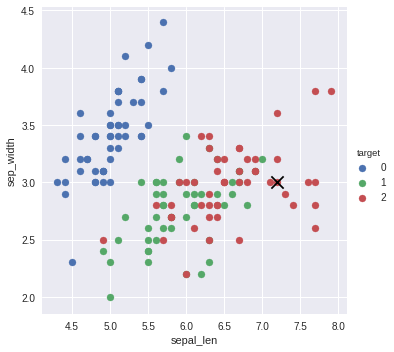

In [295]:
sns.FacetGrid(iris, hue="target", size=5) \
   .map(plt.scatter, "sepal_len", "sep_width") \
   .add_legend()

## Our unknown point
unknown = np.array([7.2, 3.0]) # then move over to 3.2 from 7.5
plt.scatter(unknown[0], unknown[1], color="black", s=150, marker="x")

model.predict([unknown])

### Let's see all those predictions!

It's helpful to attach our predictions back to our dataframe to see what they are in context to the original training set.

In [296]:
iris['predicted'] = model.predict(x)
iris

,sepal_len,sep_width,petal_len,petal_width,target,target_label,predicted
0,5.1,3.5,1.4,0.2,0,setosa,0
1,4.9,3.0,1.4,0.2,0,setosa,0
2,4.7,3.2,1.3,0.2,0,setosa,0
3,4.6,3.1,1.5,0.2,0,setosa,0
4,5.0,3.6,1.4,0.2,0,setosa,0
5,5.4,3.9,1.7,0.4,0,setosa,0
6,4.6,3.4,1.4,0.3,0,setosa,0
7,5.0,3.4,1.5,0.2,0,setosa,0
8,4.4,2.9,1.4,0.2,0,setosa,0
9,4.9,3.1,1.5,0.1,0,setosa,0


### How do you choose the best hyperparameters?

Let's use the variables "petal_width" and "petal_len" to train a new model then try a range of hyperparameters to see how it behaves in terms of our accuracy score.

Then see how our paramter $K$ affects our accuracy score over a range of values between 1 and 31.

In [155]:
features = ["petal_width", "petal_len"]

k_range  = range(1, 31)
scores   = [] # we will capture our scores here

for k in k_range:
    knn    =  KNeighborsClassifier(n_neighbors=k)
    model  =  knn.fit(iris[features], iris['target'])
    
    scores.append({
         'k':        k,
         'features': features,
         'score':    model.score(iris[features], iris['target'])
    })
    
scores = pd.DataFrame(scores)
scores.head()

,features,k,score
0,"[petal_width, petal_len]",1,0.993333
1,"[petal_width, petal_len]",2,0.973333
2,"[petal_width, petal_len]",3,0.980000
3,"[petal_width, petal_len]",4,0.973333
4,"[petal_width, petal_len]",5,0.960000


### Lets plot our scores over the range of K
This is one common strategy for searching for an optimal paramter given a set of parameters to test on.  We can do this for other metrics in the future like recall, F1, or even type 1 or 2 error statistics.

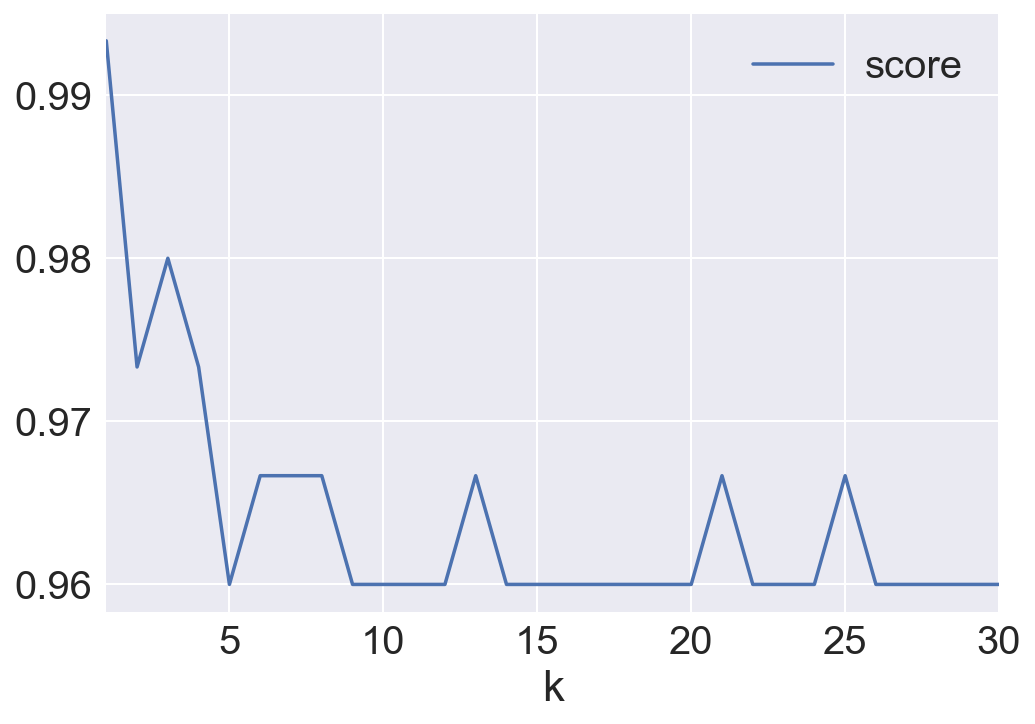

In [158]:
scores.plot(x="k", y="score")

### There's a bug with our boundry plotter code.
In some recent updates between the libraries we use, there's a small bug that prevents the color objects from being selected properly.  If we have time to fix this, it's a nice supplemental figure to see an interactive display of class boundaries that can be visually produced given a range of K.

> If there's time, we might be able to get this to work but I will leave this cell here for future work that I might submit for our class to use in the future.  -Dave

In [ ]:
# plotter = KNNBoundaryPlotter(iris, "petal_width", "petal_len", "target", nn_range=range(1,31))
# plotter.knn_mesh_runner()

# plotter.knn_interact()

---

# Independent Practice:  predict "ploidy"

### 1. Now, a more interesting example using a more complex dataset.

#### Stage C Prostate Cancer

##### Description

A set of 146 patients with stage C prostate cancer, from a
study exploring the prognostic value of flow cytometry.

##### Format

A data frame with 146 observations on the following 8 variables.

- **pgtime** (Predictor) - Time to progression or last follow-up (years)
- **pgstat** (Predictor) - 1 = progression observed, 0 = censored
- **age** (Predictor) - age in years
- **eet** (Predictor) - early endocrine therapy, 1 = no, 2 = yes
- **g2** (Predictor) - percent of cells in G2 phase, as found by flow cytometry
- **grade** (Predictor) - grade of the tumor, Farrow system
- **gleason** (Predictor) - grade of the tumor, Gleason system
- **ploidy** (Target) - the ploidy status of the tumor, from flow cytometry. Values are <span class="samp">diploid</span>, <span class="samp">tetraploid</span>, and <span class="samp">aneuploid</span></p>
</dd>
</dl>

<h3>Details</h3>

<p>A tumor is called diploid (normal complement of dividing cells) if the
fraction of cells in G2 phase was determined to be 13% or less.
Aneuploid cells have a measurable fraction with a chromosome count that
is neither 24 nor 48, for these the G2 percent is difficult or
impossible to measure.
</p>


---

### 2. Load in the dataset

We're loading this file over the network, which is possible with Pandas read_csv() method.  You might not always want to do this but to illustrate that it is possible, check it out.

> A great source of datasets can be found in this repository from vincentarelbundock on Github:  https://github.com/vincentarelbundock/Rdatasets


> Also, you might consider looking at this notebook again with a different datset in the future.  For this purpose, we recommend:
>```python
from sklearn.datasets import load_breast_cancer
bcd = load_breast_cancer()
print data['DESCR']
```

In [298]:
df = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/rpart/stagec.csv")

---

### 2.2 Clean up the columns

We should remove the unamed column and perhaps renaming the last feature to "category" as we might share this dataset with non-medical savvy colleagues in the future.

- _Unnamed_
- pgtime 
- pgstat
- age 
- eet 
- g2
- grade
- gleason
- **ploidy**

> **Other interesting details about _ploidy_**<br><br> _"Ploidy is a measure of the number of chromosomes in a cell. Chromosomes are the threadlike structures that contain the genetic material known as DNA. As cells grow and divide to make new cells, chromosomes play a key role in making sure that DNA is copied and distributed correctly." -Breastcancer.org_


In [ ]:
# A:

---

### 2.3 Check out the dataset

Print out the head and the datatypes.

In [ ]:
# How about that target / response?

### What should we check first when we look at a new dataset?
Anything interesting?

### 2.4 Clean anything up?

Remember, we need to handle `NaN` values or else our machine learning models will complain quite a bit.

### 3. What does the distribution of your variables look like?
A series of boxplots are a great choice for univariate data.

---

### 4. Use seaborn's pairplot to visualize relationships between variables

Look at the data using seaborn's `pairplot()` function. The hue will be the class variable "malignant". The variables will be the other columns excluding, of course, the subject ID column.

Most of these predictors are highly correlated with the "class" variable. This is already an indication that our classifier is very likely to perform well.

In [ ]:
# set the seaborn style to have a white background if your figures are hard to read

---

> We haven't talked about this yet but we will later in the week.  Not a huge deal ;)

### 5. (Skip this section!) Test the performance of kNN classifiers on the data using cross-validation

Let's see how the kNN classifier performs on the dataset with cross-validation.

We are going to set some parameters in the classifier constructor. Some clarification below:

1. **n_neighbors** specifies how many neighbors will vote on the class
2. **weights** uniform weights indicate that all neighbors have the same weight
3. **metric** and **p**: when distance is minkowski (the default) and p == 2 (the default), _this is equivalent to the euclidean distance metric_

Load scikit's cross-validation module and import `StratifiedKFold`

The `StratifiedKFold()` will return cross-validation _indices_ which you can use to subset your data in a for loop that runs the model and tests it. Get used to using indices for cross-validation on data – it's easy to get soft with `cross_val_score`, but being able do it at a more "manual" level allows for a lot more power and customization. It also reinforces what is happening in your head during cross-validation, since you have to divide up the data yourself with the indices!

The **stratified** version of cross-validation ensures that there are equal proportions the predicted class in each train-test fold. This is going to be a common practice in classification.

In [299]:
from sklearn.cross_validation import StratifiedKFold

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


**Create X, y from the "mean" variables data:**

In [188]:
y = iris['target']
X = iris[["petal_width", "petal_len"]]


**Create cross-validation train/test indices:**

In [189]:
cv_indices = StratifiedKFold(y, n_folds=5)

In [190]:
# Anyone want to see what these indices look like?
# for train_i, test_i in cv_indices:
#     print test_i

In [202]:
# Function to crossvalidate accuracy of a knn model acros folds
def accuracy_crossvalidator(X, Y, knn, cv_indices):
    
    # list to store the scores/accuracy of folds
    scores = []
    
    # iterate through the training and testing folds in cv_indices
    for fold_n, (train_i, test_i) in enumerate(cv_indices):
        
        # get the current X train & test subsets of X
        X_train = X.iloc[train_i, :]
        X_test = X.iloc[test_i, :].values

        # get the Y train & test subsets of Y
        Y_train = Y.iloc[train_i]
        Y_test = Y.iloc[test_i]

        # fit the knn model on the training data
        model = knn.fit(X_train, Y_train)
        
        # get the accuracy predicting the testing data
        score = model.score(X_test, Y_test)
        scores.append(score)
        
        print('Fold %d accuracy:' % fold_n, score)
        
    print('Mean CV accuracy:', np.mean(scores))

---

### 5.2: Cross-validate accuracy for a kNN model with 5 neighbors

In [208]:
mean_knn_n5 = KNeighborsClassifier(n_neighbors=5,
                                   weights='uniform')

accuracy_crossvalidator(X, y, mean_knn_n5, cv_indices)

('Fold 0 accuracy:', 0.96666666666666667)
('Fold 1 accuracy:', 0.96666666666666667)
('Fold 2 accuracy:', 0.93333333333333335)
('Fold 3 accuracy:', 0.96666666666666667)
('Fold 4 accuracy:', 1.0)
('Mean CV accuracy:', 0.96666666666666679)


---

### 5.3: Cross-validate accuracy for a kNN model with 1 neighbor

As you can see the mean cross-validated accuracy is very high with 5 neighbors. 

Let's see what it's like when we use only 1 neighbor:

In [209]:
mean_knn_n2 = KNeighborsClassifier(
    n_neighbors=1,       # The parameter K for number of neighbors
    weights='uniform'    # How votes are calculated per neighborhood for predicted points
)

accuracy_crossvalidator(X, y, mean_knn_n2, cv_indices)

('Fold 0 accuracy:', 0.96666666666666667)
('Fold 1 accuracy:', 0.96666666666666667)
('Fold 2 accuracy:', 0.96666666666666667)
('Fold 3 accuracy:', 0.96666666666666667)
('Fold 4 accuracy:', 1.0)
('Mean CV accuracy:', 0.97333333333333338)


---

### 6. Plot the kNN prediction boundary

Even with 1 neighbor we do quite well at predicting the malignant observations.

Below you can load an interactive KNN visualization class I wrote and put in your new `utils` directory.

The `KNNBoundaryPlotter` class has 4 required arguments:

    KNNBoundaryPlotter(data, predictor1, predictor2, class_target)
    
It will by default fit a visualization of the decision boundary across 1 to 100 nearest neighbors.

The boundary is where the classifier will vote for different classes. 


In [211]:
## In case widgets are unavailable you can attempt to install these addons
## through these bang operation:
#
# !pip install widgetsnbextension

In [ ]:
# !jupyter nbextension enable --py --sys-prefix widgetsnbextension

## Further Independent Practice

Continue working on some of these yourself.

### 6.2 Try out some other variables of interest to you then visualize them before fitting a new model.

---

### 7. What is the effect of increasing/decreasing the neighbors?

In [ ]:
#

---

### 8. What could be wrong with using accuracy as your measure of performance?

In [ ]:
#

---

### 9. Explain changing the number of neighbors in terms of bias-variance tradeoff